# Iris Flower Clustering Analysis Project

# Iris Flower Clustering Analysis Project

This project explores different clustering techniques applied to the famous Iris flower dataset. Through unsupervised machine learning algorithms, we'll identify natural groupings within the Iris dataset and evaluate the performance of various clustering methods. The project demonstrates the complete workflow from data loading and preprocessing to model building, evaluation, and visualization.

## Introduction to Clustering

Clustering is an unsupervised machine learning technique that groups similar data points together based on certain features without prior knowledge of class labels. In this project, we will apply several clustering algorithms to the Iris flower dataset, which contains measurements for 150 iris flowers from three different species.

We will implement the following clustering techniques:
- K-Means Clustering
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- Agglomerative Hierarchical Clustering
- Gaussian Mixture Model (GMM)

## Setup and Data Loading

First, let's import all necessary libraries for our clustering analysis.

In [79]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot styling
sns.set_theme(style="whitegrid")

# For reproducibility
np.random.seed(42)

print("Import of basic packages successful")

Import of basic packages successful


Now, let's load the Iris dataset using scikit-learn's built-in datasets.

In [80]:
# Import the Iris dataset
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert to DataFrame for better processing and visualization
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y

# Display information about the dataset
print("Dataset information:")
print(df.info())

# Display the first 5 rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4  

Let's explore the distribution of classes in our dataset.


Class distribution:
target
0    50
1    50
2    50
Name: count, dtype: int64


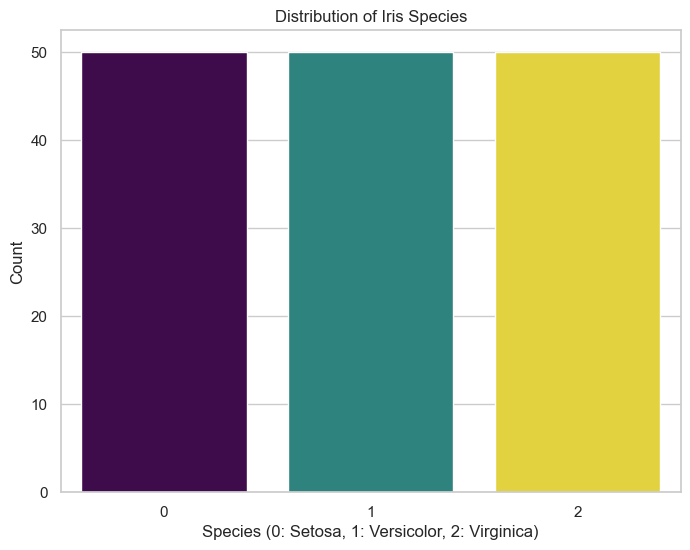

In [81]:
# Count the number of samples in each class
class_counts = df['target'].value_counts()
print("\nClass distribution:")
print(class_counts)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', hue='target', data=df, palette='viridis', legend=False)
plt.title('Distribution of Iris Species')
plt.xlabel('Species (0: Setosa, 1: Versicolor, 2: Virginica)')
plt.ylabel('Count')
plt.show()

Let's visualize the data to get a better understanding of the feature distributions.

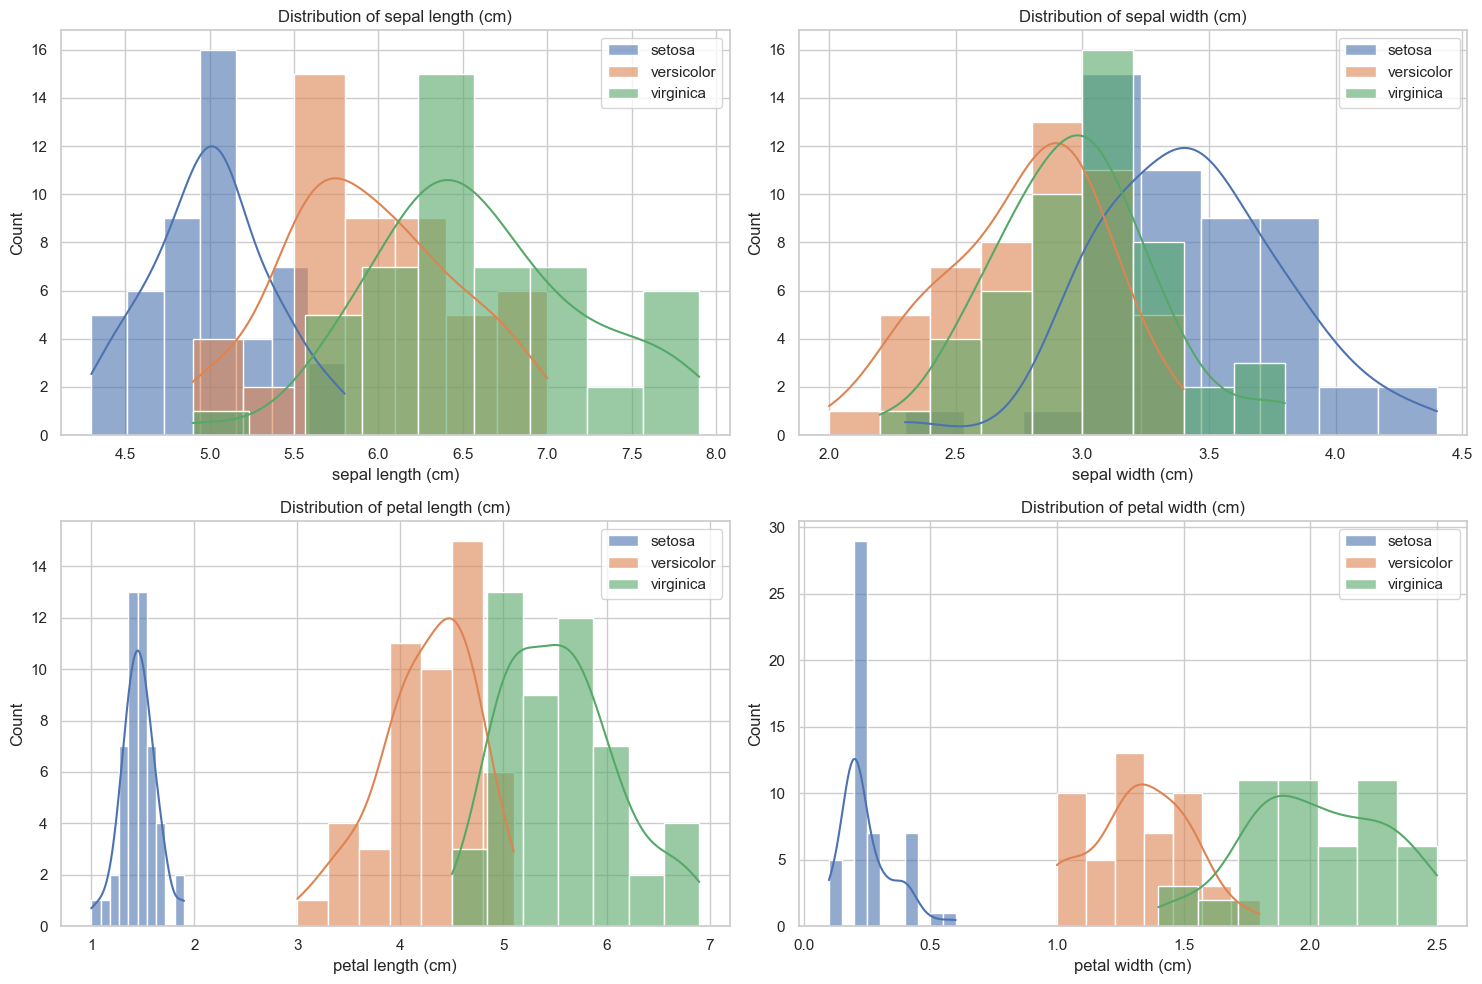

In [82]:
# Visualize the feature distributions for each class
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    for class_label in range(3):
        sns.histplot(df[df['target'] == class_label][feature], 
                    label=iris.target_names[class_label],
                    kde=True, alpha=0.6)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.legend()
plt.tight_layout()
plt.show()

Now, let's create a pairplot to see relationships between features.

<Figure size 1200x1000 with 0 Axes>

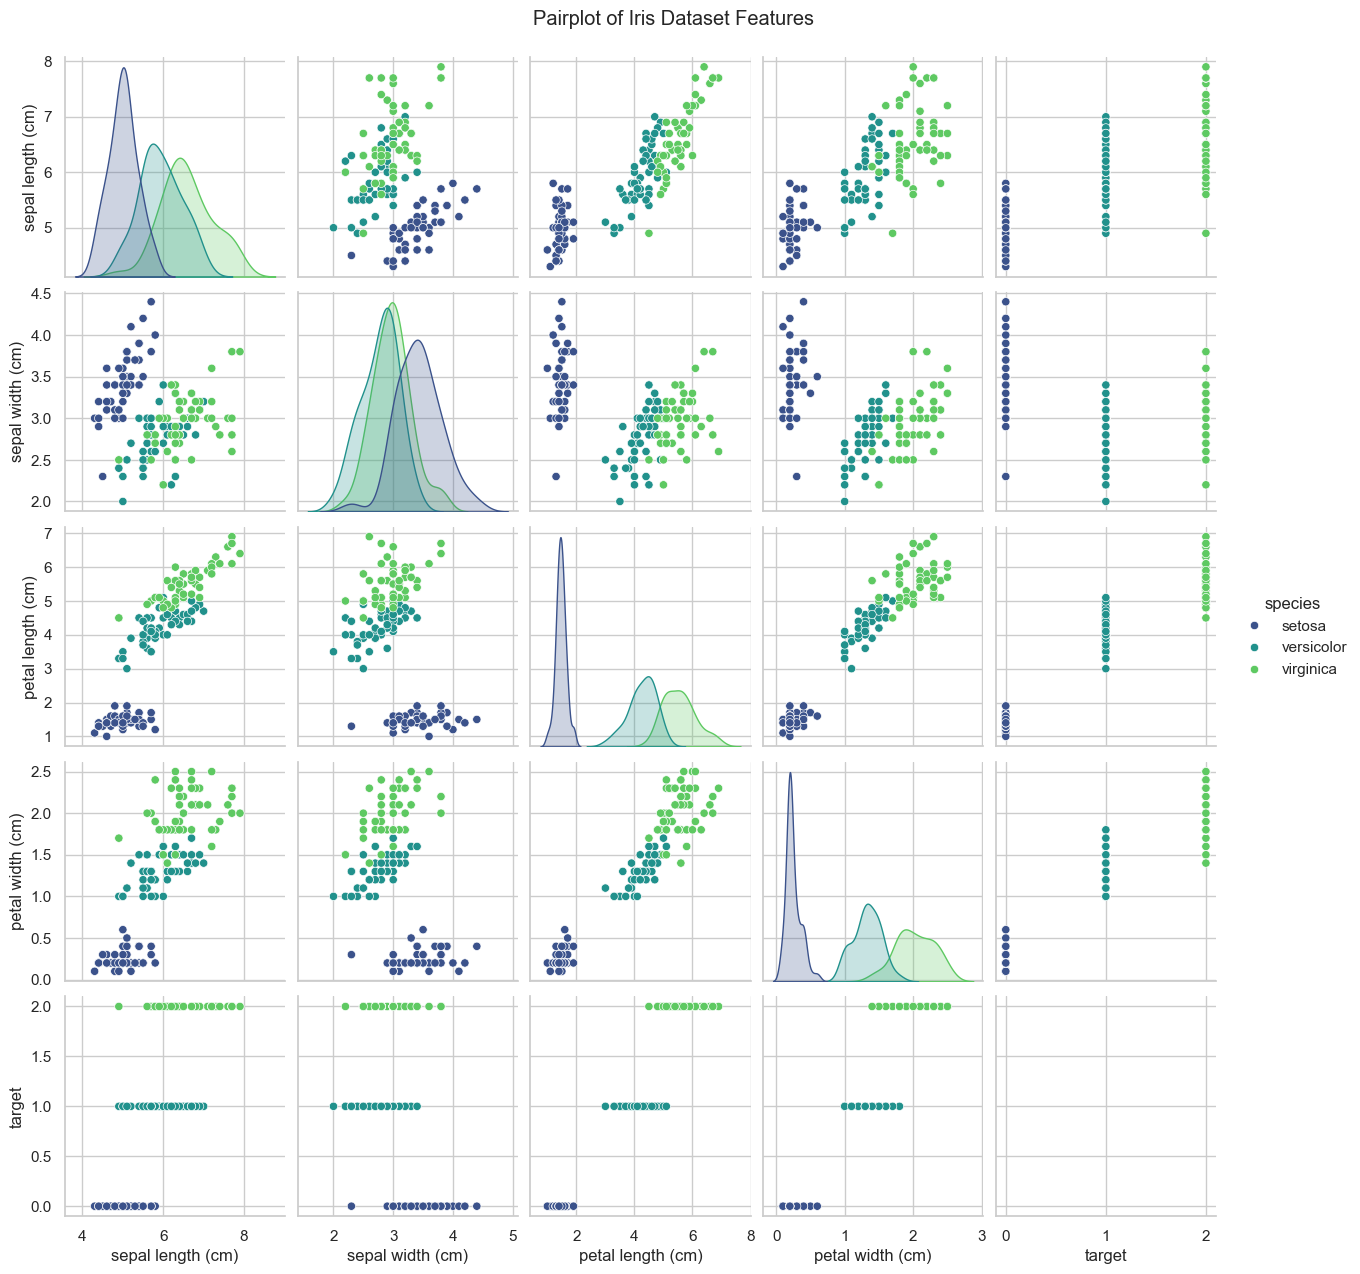

In [83]:
# Create a new column with class names for better visualization
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Create a pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Iris Dataset Features', y=1.02)
plt.show()

## Data Preparation

For clustering analysis, we'll split the data into training and testing sets, and then apply appropriate preprocessing techniques.

In [84]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Train and test data shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

Train and test data shapes:
X_train: (100, 4) X_test: (50, 4)
y_train: (100,) y_test: (50,)


Now, let's apply data preprocessing techniques. We'll standardize the features to ensure they're on the same scale.

In [85]:
# Import preprocessing methods
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standard Scaled Data (First 5 rows):")
print(X_train_scaled[:5])

# Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

print("\nMin-Max Scaled Data (First 5 rows):")
print(X_train_minmax[:5])

# Apply Normalization
normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

print("\nNormalized Data (First 5 rows):")
print(X_train_normalized[:5])

# We will primarily use the StandardScaler results for our clustering

Standard Scaled Data (First 5 rows):
[[-0.13835603 -0.26550845  0.22229072  0.10894943]
 [ 2.14752625 -0.02631165  1.61160773  1.18499319]
 [-0.25866563 -0.02631165  0.39595535  0.37796037]
 [-0.8602136   1.16967238 -1.39857913 -1.37061074]
 [ 2.26783585 -0.50470526  1.66949594  1.05048772]]

Min-Max Scaled Data (First 5 rows):
[[0.41176471 0.40909091 0.55357143 0.5       ]
 [0.97058824 0.45454545 0.98214286 0.83333333]
 [0.38235294 0.45454545 0.60714286 0.58333333]
 [0.23529412 0.68181818 0.05357143 0.04166667]
 [1.         0.36363636 1.         0.79166667]]

Normalized Data (First 5 rows):
[[0.73446047 0.37367287 0.5411814  0.16750853]
 [0.70953708 0.28008043 0.61617694 0.1960563 ]
 [0.70631892 0.37838513 0.5675777  0.18919257]
 [0.80377277 0.55160877 0.22064351 0.0315205 ]
 [0.71486543 0.25995106 0.62202576 0.18567933]]


## Dimensionality Reduction

Dimensionality reduction can help visualize high-dimensional data in 2D or 3D space and sometimes improves clustering performance. Let's apply several dimensionality reduction techniques.

In [86]:
# Import dimensionality reduction methods
from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# PCA (Principal Component Analysis)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("PCA Reduced Training data shape:", X_train_pca.shape)
print("PCA Reduced Testing data shape:", X_test_pca.shape)
print("PCA explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))

# LDA (Linear Discriminant Analysis)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

print("\nLDA Reduced Training data shape:", X_train_lda.shape)
print("LDA Reduced Testing data shape:", X_test_lda.shape)

# NMF (Non-Negative Matrix Factorization)
# NMF requires non-negative data, so we'll use absolute values
nmf = NMF(n_components=2, init='random', random_state=42)
X_train_nmf = nmf.fit_transform(np.abs(X_train_scaled))
X_test_nmf = nmf.transform(np.abs(X_test_scaled))

print("\nNMF Reduced Training data shape:", X_train_nmf.shape)
print("NMF Reduced Testing data shape:", X_test_nmf.shape)

# SVD (Singular Value Decomposition)
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train_scaled)
X_test_svd = svd.transform(X_test_scaled)

print("\nSVD Reduced Training data shape:", X_train_svd.shape)
print("SVD Reduced Testing data shape:", X_test_svd.shape)
print("SVD explained variance ratio:", svd.explained_variance_ratio_)
print("Total variance explained:", sum(svd.explained_variance_ratio_))

PCA Reduced Training data shape: (100, 2)
PCA Reduced Testing data shape: (50, 2)
PCA explained variance ratio: [0.71201434 0.23965364]
Total variance explained: 0.9516679799429026

LDA Reduced Training data shape: (100, 2)
LDA Reduced Testing data shape: (50, 2)

NMF Reduced Training data shape: (100, 2)
NMF Reduced Testing data shape: (50, 2)

SVD Reduced Training data shape: (100, 2)
SVD Reduced Testing data shape: (50, 2)
SVD explained variance ratio: [0.71201434 0.23965364]
Total variance explained: 0.9516679799429019


Let's visualize the results of our dimensionality reduction techniques.

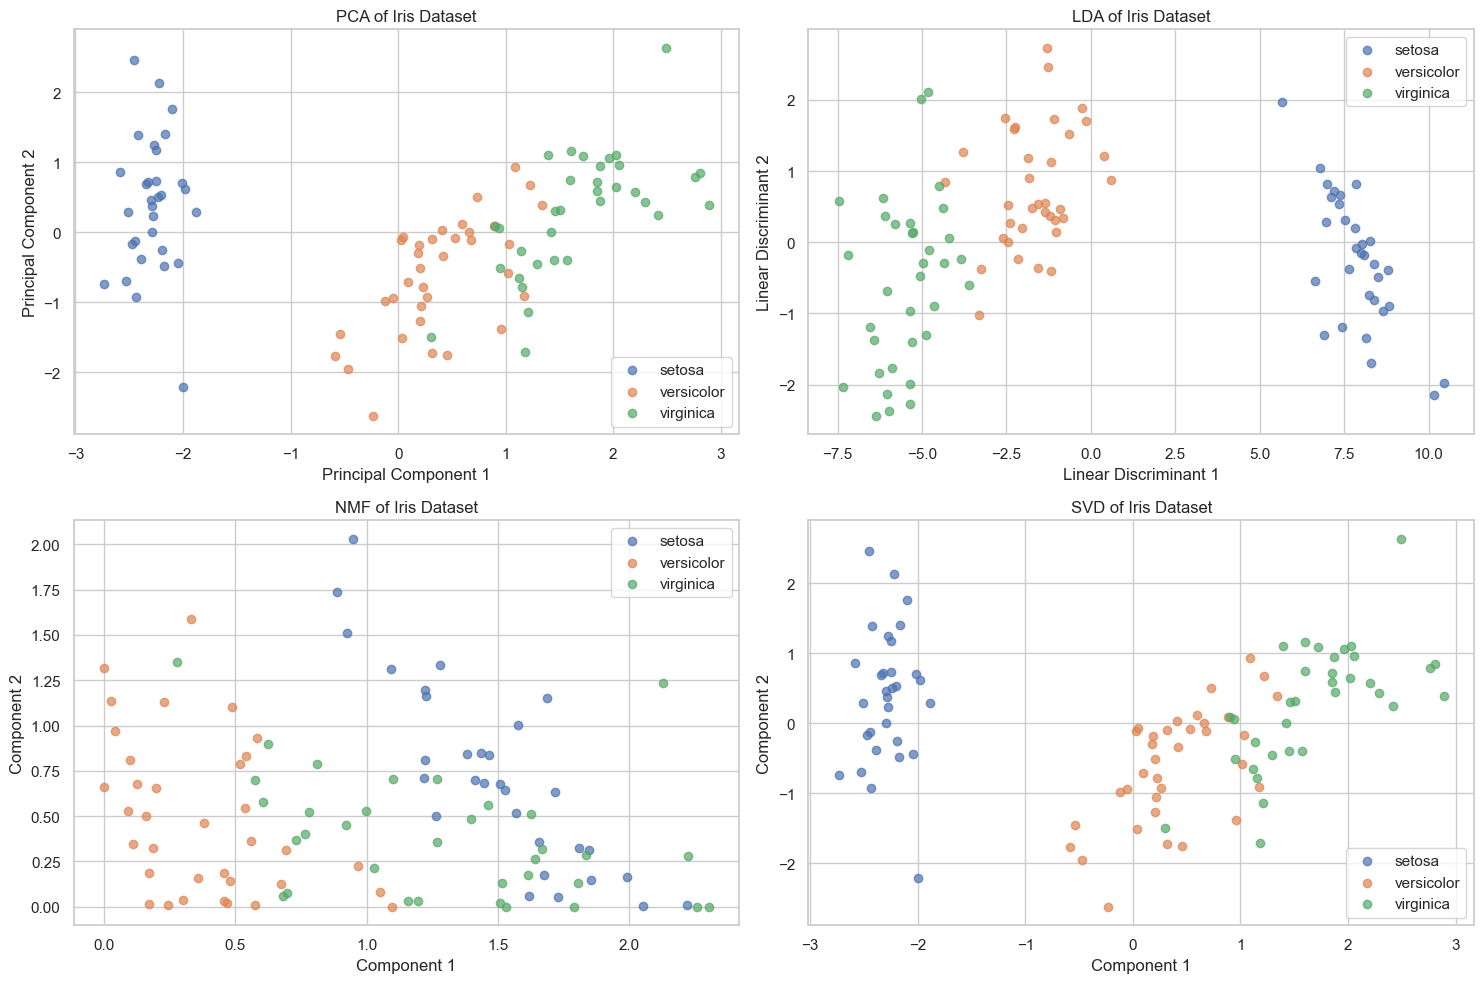

In [87]:
# Visualize PCA results with true class labels
plt.figure(figsize=(15, 10))

# PCA Plot
plt.subplot(2, 2, 1)
for class_label in range(3):
    plt.scatter(X_train_pca[y_train == class_label, 0], 
                X_train_pca[y_train == class_label, 1], 
                alpha=0.7, 
                label=iris.target_names[class_label])
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# LDA Plot
plt.subplot(2, 2, 2)
for class_label in range(3):
    plt.scatter(X_train_lda[y_train == class_label, 0], 
                X_train_lda[y_train == class_label, 1], 
                alpha=0.7, 
                label=iris.target_names[class_label])
plt.title('LDA of Iris Dataset')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend()

# NMF Plot
plt.subplot(2, 2, 3)
for class_label in range(3):
    plt.scatter(X_train_nmf[y_train == class_label, 0], 
                X_train_nmf[y_train == class_label, 1], 
                alpha=0.7, 
                label=iris.target_names[class_label])
plt.title('NMF of Iris Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()

# SVD Plot
plt.subplot(2, 2, 4)
for class_label in range(3):
    plt.scatter(X_train_svd[y_train == class_label, 0], 
                X_train_svd[y_train == class_label, 1], 
                alpha=0.7, 
                label=iris.target_names[class_label])
plt.title('SVD of Iris Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()

plt.tight_layout()
plt.show()

## Clustering Analysis

Now let's implement different clustering algorithms and evaluate their performance.

### K-Means Clustering

In [88]:
# Import clustering algorithms
from sklearn.cluster import KMeans

# Implement K-Means clustering
km = KMeans(n_clusters=3, random_state=42, n_init=10)
km.fit(X_train_scaled)

# Predict clusters for test data
km_labels = km.predict(X_test_scaled)

print("K-Means Cluster Centers:")
print(km.cluster_centers_)
print("\nK-Means Cluster Labels (First 10):", km_labels[:10])

K-Means Cluster Centers:
[[ 1.26834076  0.26808442  1.08170798  1.09187402]
 [-1.02321369  0.87646339 -1.36123189 -1.30552745]
 [-0.02923803 -0.79396651  0.32729724  0.28099131]]

K-Means Cluster Labels (First 10): [2 1 0 2 0 1 2 0 2 2]


### DBSCAN Clustering

In [89]:
# Import DBSCAN
from sklearn.cluster import DBSCAN

# Implement DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=3)
db_labels = db.fit_predict(X_test_scaled)

print("DBSCAN Cluster Labels (First 10):", db_labels[:10])
print("Number of clusters found:", len(set(db_labels)) - (1 if -1 in db_labels else 0))
print("Number of noise points:", list(db_labels).count(-1))

DBSCAN Cluster Labels (First 10): [-1  1 -1 -1 -1  0 -1  3 -1 -1]
Number of clusters found: 4
Number of noise points: 25


### Agglomerative Clustering

In [90]:
# Import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Implement Agglomerative clustering
am = AgglomerativeClustering(n_clusters=3)
am_labels = am.fit_predict(X_test_scaled)

print("Agglomerative Clustering Labels (First 10):", am_labels[:10])

Agglomerative Clustering Labels (First 10): [2 0 1 2 1 0 2 1 2 2]


### Gaussian Mixture Model

In [91]:
# Import Gaussian Mixture Model
from sklearn.mixture import GaussianMixture

# Implement Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_train_scaled)
gmm_labels = gmm.predict(X_test_scaled)

print("Gaussian Mixture Model Cluster Labels (First 10):", gmm_labels[:10])

Gaussian Mixture Model Cluster Labels (First 10): [1 0 2 1 1 0 1 2 1 1]


## Evaluation of Clustering Performance

Let's evaluate the performance of our clustering algorithms using various metrics.

In [92]:
# Import evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Create a function to calculate and display evaluation metrics
def evaluate_clustering(X, labels, algorithm_name):
    # Skip evaluation if there's only one cluster or all points are noise
    unique_labels = set(labels)
    if len(unique_labels) <= 1 or (len(unique_labels) == 2 and -1 in unique_labels):
        print(f"{algorithm_name} clustering resulted in a single cluster or mostly noise. Performance metrics cannot be calculated.")
        return None, None, None
    
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    
    print(f"\nPerformance of {algorithm_name} clustering:")
    print(f"Silhouette score: {silhouette:.6f} (higher is better)")
    print(f"Davies-Bouldin Index: {davies_bouldin:.6f} (lower is better)")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.6f} (higher is better)")
    
    return silhouette, davies_bouldin, calinski_harabasz

# Evaluate K-Means
km_silhouette, km_davies_bouldin, km_calinski_harabasz = evaluate_clustering(X_test_scaled, km_labels, "K-Means")

# Evaluate DBSCAN
if len(set(db_labels)) > 1:
    db_silhouette, db_davies_bouldin, db_calinski_harabasz = evaluate_clustering(X_test_scaled, db_labels, "DBSCAN")
else:
    print("\nDBSCAN clustering resulted in a single cluster or noise. Performance metrics cannot be calculated.")
    db_silhouette, db_davies_bouldin, db_calinski_harabasz = None, None, None

# Evaluate Agglomerative Clustering
am_silhouette, am_davies_bouldin, am_calinski_harabasz = evaluate_clustering(X_test_scaled, am_labels, "Agglomerative")

# Evaluate Gaussian Mixture Model
gmm_silhouette, gmm_davies_bouldin, gmm_calinski_harabasz = evaluate_clustering(X_test_scaled, gmm_labels, "Gaussian Mixture Model")


Performance of K-Means clustering:
Silhouette score: 0.422220 (higher is better)
Davies-Bouldin Index: 0.924276 (lower is better)
Calinski-Harabasz Index: 78.820323 (higher is better)

Performance of DBSCAN clustering:
Silhouette score: 0.029476 (higher is better)
Davies-Bouldin Index: 2.050623 (lower is better)
Calinski-Harabasz Index: 13.126853 (higher is better)

Performance of Agglomerative clustering:
Silhouette score: 0.431728 (higher is better)
Davies-Bouldin Index: 0.898149 (lower is better)
Calinski-Harabasz Index: 79.450026 (higher is better)

Performance of Gaussian Mixture Model clustering:
Silhouette score: 0.422903 (higher is better)
Davies-Bouldin Index: 0.988279 (lower is better)
Calinski-Harabasz Index: 75.744095 (higher is better)


Let's compare our clustering results with the true labels.

In [93]:
# Function to calculate adjusted rand index
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

def compare_with_true_labels(true_labels, predicted_labels, algorithm_name):
    ari = adjusted_rand_score(true_labels, predicted_labels)
    nmi = normalized_mutual_info_score(true_labels, predicted_labels)
    
    print(f"\nComparison of {algorithm_name} with true labels:")
    print(f"Adjusted Rand Index: {ari:.6f} (higher is better, max 1.0)")
    print(f"Normalized Mutual Information: {nmi:.6f} (higher is better, max 1.0)")
    
    return ari, nmi

# Compare K-Means with true labels
km_ari, km_nmi = compare_with_true_labels(y_test, km_labels, "K-Means")

# Compare DBSCAN with true labels (if applicable)
if len(set(db_labels)) > 1:
    db_ari, db_nmi = compare_with_true_labels(y_test, db_labels, "DBSCAN")
else:
    db_ari, db_nmi = None, None

# Compare Agglomerative Clustering with true labels
am_ari, am_nmi = compare_with_true_labels(y_test, am_labels, "Agglomerative")

# Compare Gaussian Mixture Model with true labels
gmm_ari, gmm_nmi = compare_with_true_labels(y_test, gmm_labels, "Gaussian Mixture Model")


Comparison of K-Means with true labels:
Adjusted Rand Index: 0.576283 (higher is better, max 1.0)
Normalized Mutual Information: 0.623796 (higher is better, max 1.0)

Comparison of DBSCAN with true labels:
Adjusted Rand Index: 0.303179 (higher is better, max 1.0)
Normalized Mutual Information: 0.508631 (higher is better, max 1.0)

Comparison of Agglomerative with true labels:
Adjusted Rand Index: 0.592755 (higher is better, max 1.0)
Normalized Mutual Information: 0.636142 (higher is better, max 1.0)

Comparison of Gaussian Mixture Model with true labels:
Adjusted Rand Index: 0.760608 (higher is better, max 1.0)
Normalized Mutual Information: 0.803924 (higher is better, max 1.0)


## Visualization of Clusters using t-SNE

t-SNE is a powerful dimensionality reduction technique that can help visualize high-dimensional clusters.

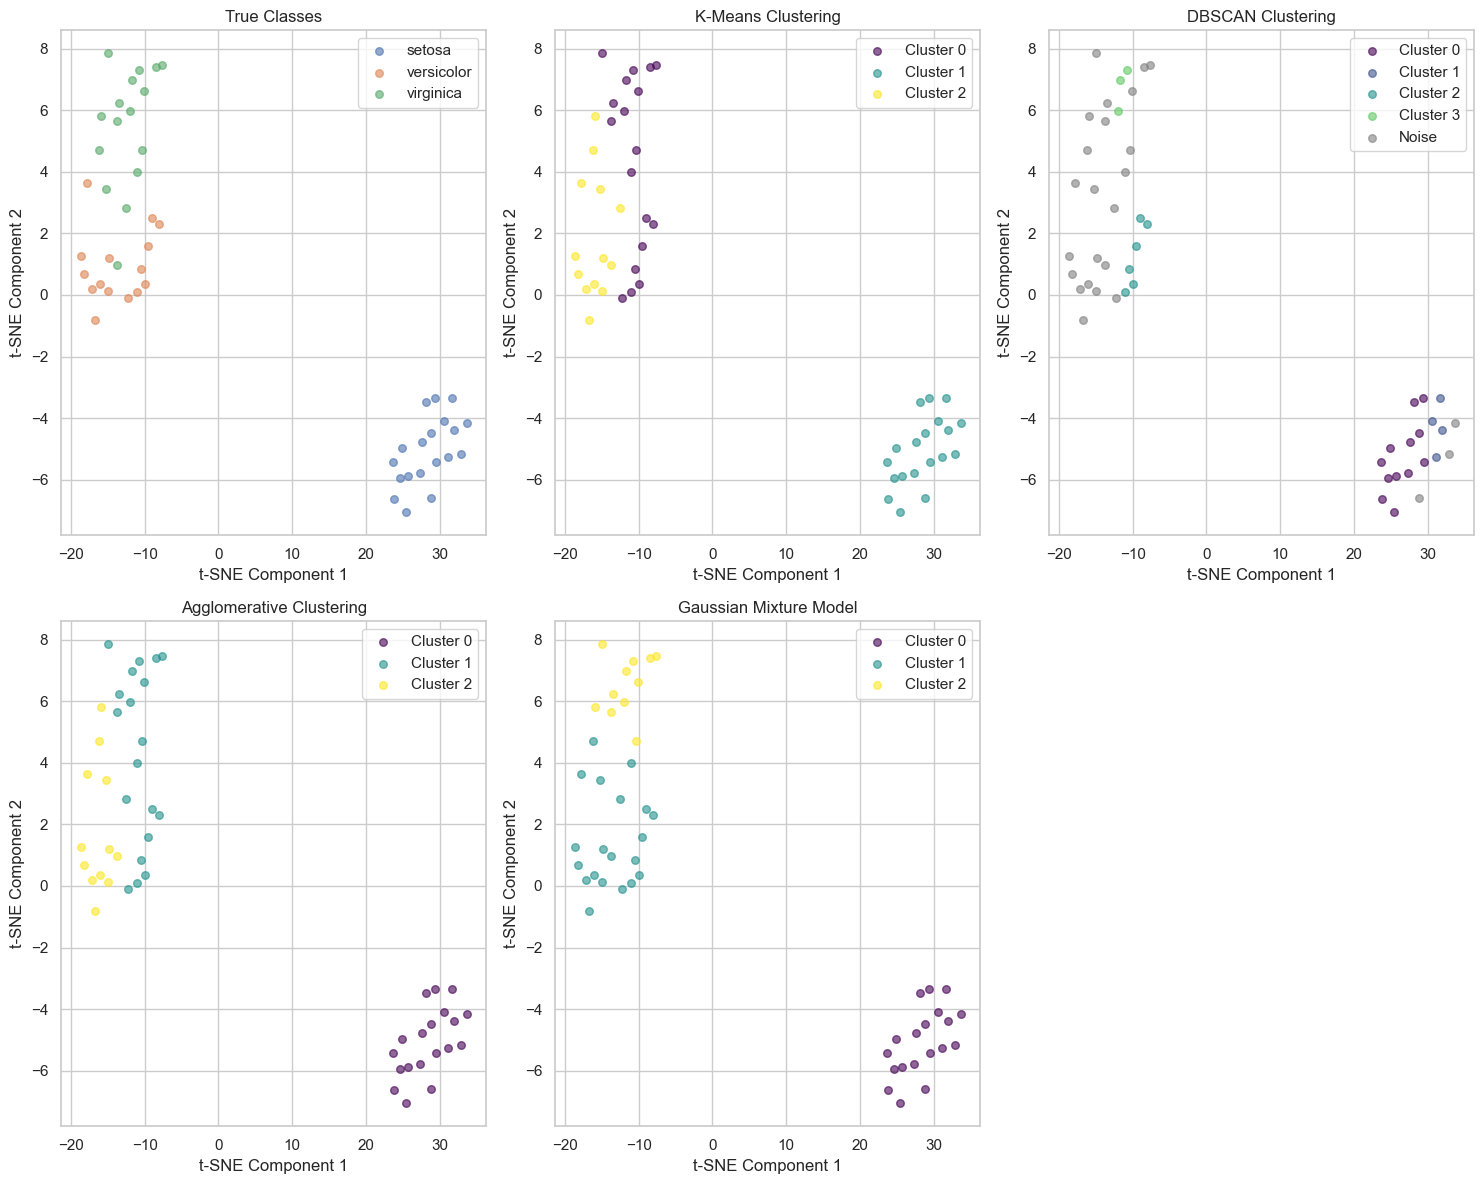

In [94]:
# Import t-SNE
from sklearn.manifold import TSNE

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
X_tsne = tsne.fit_transform(X_test_scaled)

# Create a function to visualize clusters
def plot_clusters(X, labels, title, ax):
    # Get unique labels
    unique_labels = set(labels)
    
    # Create color map (handling noise points in DBSCAN which are labeled as -1)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
    
    # Plot points
    for i, label in enumerate(unique_labels):
        mask = labels == label
        if label == -1:  # Noise points in DBSCAN
            ax.scatter(X[mask, 0], X[mask, 1], alpha=0.6, s=30, c='gray', label='Noise')
        else:
            ax.scatter(X[mask, 0], X[mask, 1], alpha=0.6, s=30, c=[colors[i]], label=f'Cluster {label}')
            
    ax.set_title(title)
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')
    ax.legend()

# Create a plot with all clustering results
plt.figure(figsize=(15, 12))

# Plot true classes
ax1 = plt.subplot(2, 3, 1)
for class_label in range(3):
    mask = y_test == class_label
    ax1.scatter(X_tsne[mask, 0], X_tsne[mask, 1], alpha=0.6, s=30, label=iris.target_names[class_label])
ax1.set_title('True Classes')
ax1.set_xlabel('t-SNE Component 1')
ax1.set_ylabel('t-SNE Component 2')
ax1.legend()

# Plot K-Means clusters
ax2 = plt.subplot(2, 3, 2)
plot_clusters(X_tsne, km_labels, 'K-Means Clustering', ax2)

# Plot DBSCAN clusters
ax3 = plt.subplot(2, 3, 3)
plot_clusters(X_tsne, db_labels, 'DBSCAN Clustering', ax3)

# Plot Agglomerative clusters
ax4 = plt.subplot(2, 3, 4)
plot_clusters(X_tsne, am_labels, 'Agglomerative Clustering', ax4)

# Plot GMM clusters
ax5 = plt.subplot(2, 3, 5)
plot_clusters(X_tsne, gmm_labels, 'Gaussian Mixture Model', ax5)

plt.tight_layout()
plt.show()

## Comparing Cluster Performance

Let's create a comparison of all clustering methods.

Comparison of Clustering Methods:
          Models  Silhouette Score  Davies-Bouldin Index  \
0        K-Means          0.422220              0.924276   
1         DBSCAN          0.029476              2.050623   
2  Agglomerative          0.431728              0.898149   
3            GMM          0.422903              0.988279   

   Calinski-Harabasz Index  Adjusted Rand Index  Normalized Mutual Info  
0                78.820323             0.576283                0.623796  
1                13.126853             0.303179                0.508631  
2                79.450026             0.592755                0.636142  
3                75.744095             0.760608                0.803924  


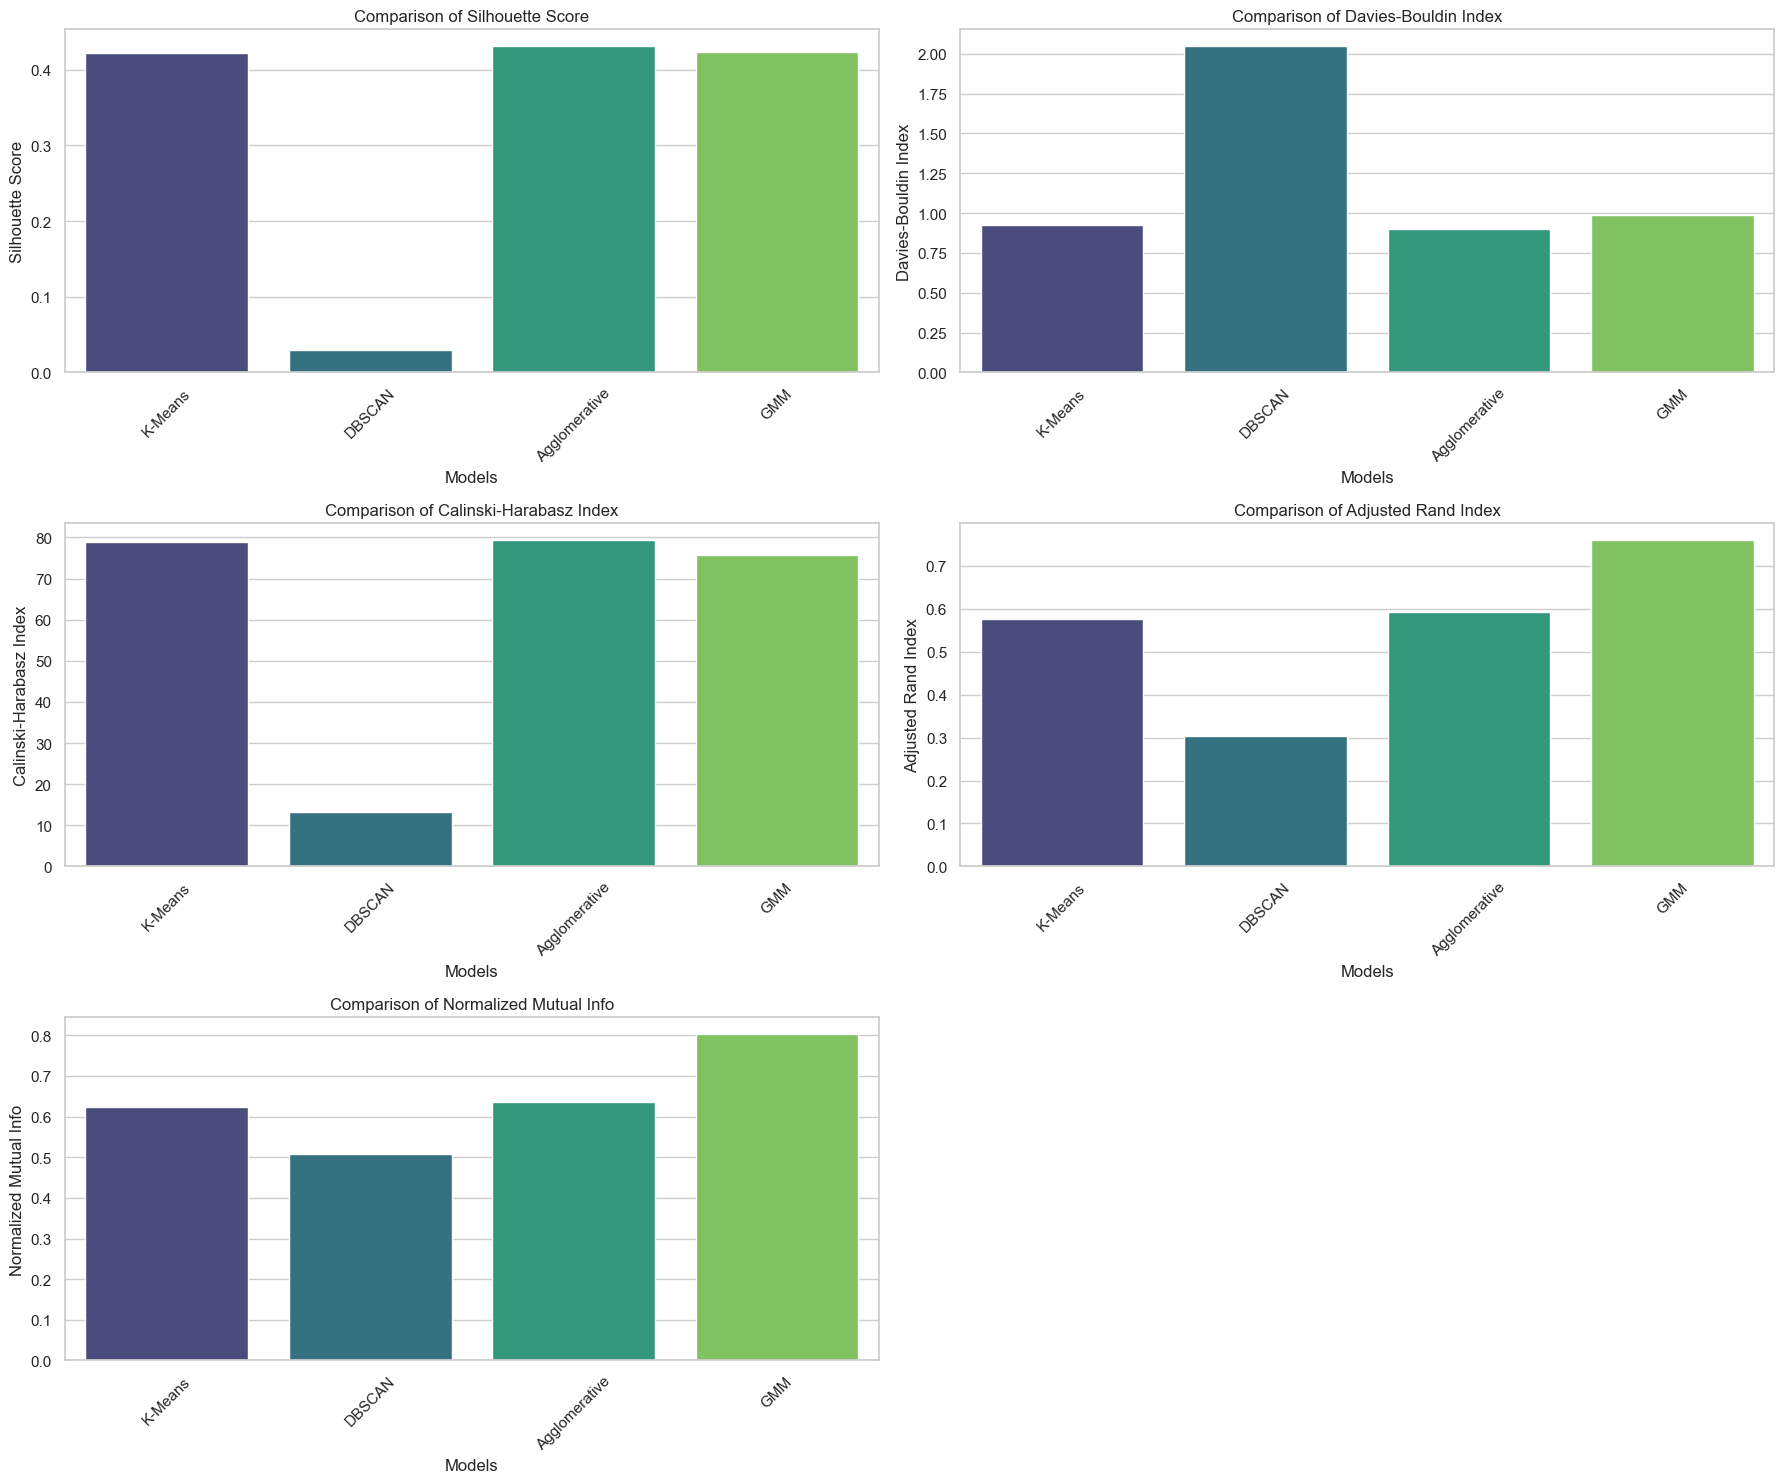

In [95]:
# Create a DataFrame to compare all metrics
if db_silhouette is not None:
    eval_data = {
        "Models": ['K-Means', 'DBSCAN', 'Agglomerative', 'GMM'],
        "Silhouette Score": [km_silhouette, db_silhouette, am_silhouette, gmm_silhouette],
        "Davies-Bouldin Index": [km_davies_bouldin, db_davies_bouldin, am_davies_bouldin, gmm_davies_bouldin],
        "Calinski-Harabasz Index": [km_calinski_harabasz, db_calinski_harabasz, am_calinski_harabasz, gmm_calinski_harabasz],
        "Adjusted Rand Index": [km_ari, db_ari, am_ari, gmm_ari],
        "Normalized Mutual Info": [km_nmi, db_nmi, am_nmi, gmm_nmi]
    }
else:
    eval_data = {
        "Models": ['K-Means', 'Agglomerative', 'GMM'],
        "Silhouette Score": [km_silhouette, am_silhouette, gmm_silhouette],
        "Davies-Bouldin Index": [km_davies_bouldin, am_davies_bouldin, gmm_davies_bouldin],
        "Calinski-Harabasz Index": [km_calinski_harabasz, am_calinski_harabasz, gmm_calinski_harabasz],
        "Adjusted Rand Index": [km_ari, am_ari, gmm_ari],
        "Normalized Mutual Info": [km_nmi, am_nmi, gmm_nmi]
    }

eval_df = pd.DataFrame(eval_data)
print("Comparison of Clustering Methods:")
print(eval_df)

# Plot comparison of metrics
metrics = ["Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Index", "Adjusted Rand Index", "Normalized Mutual Info"]
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    if i < len(axes):
        ax = axes[i]
        sns.barplot(
            x="Models", 
            y=metric, 
            hue="Models", 
            data=eval_df, 
            palette='viridis', 
            ax=ax, 
            legend=False
        )
        ax.set_title(f'Comparison of {metric}')
        ax.set_ylabel(metric)
        ax.set_xlabel("Models")
        ax.tick_params(axis='x', rotation=45)


# Hide the unused subplot
if len(metrics) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

Let's create a more interpretable combined visualization.

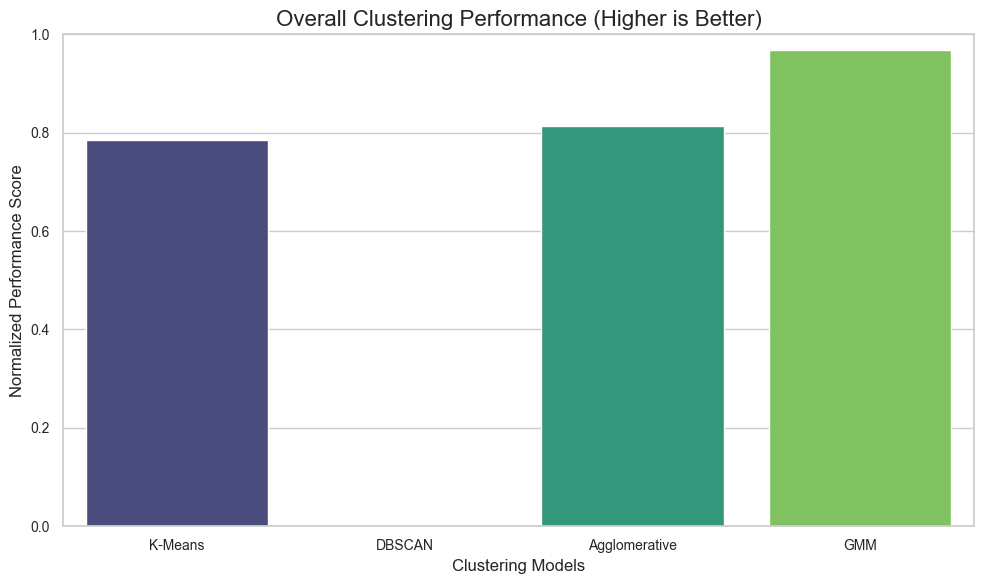

In [96]:
# Create a normalized comparison
def normalize_metric(values, higher_is_better=True):
    min_val = min(values)
    max_val = max(values)
    if max_val == min_val:
        return [0.5] * len(values)
    
    if higher_is_better:
        return [(val - min_val) / (max_val - min_val) for val in values]
    else:
        return [1 - ((val - min_val) / (max_val - min_val)) for val in values]

# Normalize each metric (note: for Davies-Bouldin, lower is better)
if db_silhouette is not None:
    norm_silhouette = normalize_metric([km_silhouette, db_silhouette, am_silhouette, gmm_silhouette], True)
    norm_davies = normalize_metric([km_davies_bouldin, db_davies_bouldin, am_davies_bouldin, gmm_davies_bouldin], False)
    norm_calinski = normalize_metric([km_calinski_harabasz, db_calinski_harabasz, am_calinski_harabasz, gmm_calinski_harabasz], True)
    norm_ari = normalize_metric([km_ari, db_ari, am_ari, gmm_ari], True)
    norm_nmi = normalize_metric([km_nmi, db_nmi, am_nmi, gmm_nmi], True)
    
    # Calculate average normalized score
    avg_scores = [(a+b+c+d+e)/5 for a,b,c,d,e in zip(norm_silhouette, norm_davies, norm_calinski, norm_ari, norm_nmi)]
    
    # Create a DataFrame with normalized scores
    norm_data = {
        "Models": ['K-Means', 'DBSCAN', 'Agglomerative', 'GMM'],
        "Normalized Score": avg_scores
    }
else:
    norm_silhouette = normalize_metric([km_silhouette, am_silhouette, gmm_silhouette], True)
    norm_davies = normalize_metric([km_davies_bouldin, am_davies_bouldin, gmm_davies_bouldin], False)
    norm_calinski = normalize_metric([km_calinski_harabasz, am_calinski_harabasz, gmm_calinski_harabasz], True)
    norm_ari = normalize_metric([km_ari, am_ari, gmm_ari], True)
    norm_nmi = normalize_metric([km_nmi, am_nmi, gmm_nmi], True)
    
    # Calculate average normalized score
    avg_scores = [(a+b+c+d+e)/5 for a,b,c,d,e in zip(norm_silhouette, norm_davies, norm_calinski, norm_ari, norm_nmi)]
    
    # Create a DataFrame with normalized scores
    norm_data = {
        "Models": ['K-Means', 'Agglomerative', 'GMM'],
        "Normalized Score": avg_scores
    }

norm_df = pd.DataFrame(norm_data)

# Plot overall performance
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Models",
    y="Normalized Score",
    hue="Models",
    data=norm_df,
    palette='viridis',
    legend=False
)
plt.title('Overall Clustering Performance (Higher is Better)', fontsize=16)
plt.ylabel('Normalized Performance Score', fontsize=12)
plt.xlabel('Clustering Models', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Final Performance Analysis

Let's analyze which clustering algorithm performed best and why:

In [97]:
# Identify the best performing algorithm
best_idx = norm_df["Normalized Score"].idxmax()
best_model = norm_df.iloc[best_idx]["Models"]
best_score = norm_df.iloc[best_idx]["Normalized Score"]

print(f"The best performing clustering algorithm is {best_model} with a normalized score of {best_score:.4f}")

# Print detailed analysis
print("\nDetailed performance analysis:")
for i, model in enumerate(eval_df["Models"]):
    print(f"\n{model} Clustering:")
    print(f"  Silhouette Score: {eval_df['Silhouette Score'][i]:.4f} - Measures how well samples are clustered")
    print(f"  Davies-Bouldin Index: {eval_df['Davies-Bouldin Index'][i]:.4f} - Lower values indicate better clustering")
    print(f"  Calinski-Harabasz Index: {eval_df['Calinski-Harabasz Index'][i]:.4f} - Higher values indicate better clustering")
    print(f"  Adjusted Rand Index: {eval_df['Adjusted Rand Index'][i]:.4f} - Measures similarity to true labels")
    print(f"  Normalized Mutual Info: {eval_df['Normalized Mutual Info'][i]:.4f} - Measures shared information with true labels")

The best performing clustering algorithm is GMM with a normalized score of 0.9688

Detailed performance analysis:

K-Means Clustering:
  Silhouette Score: 0.4222 - Measures how well samples are clustered
  Davies-Bouldin Index: 0.9243 - Lower values indicate better clustering
  Calinski-Harabasz Index: 78.8203 - Higher values indicate better clustering
  Adjusted Rand Index: 0.5763 - Measures similarity to true labels
  Normalized Mutual Info: 0.6238 - Measures shared information with true labels

DBSCAN Clustering:
  Silhouette Score: 0.0295 - Measures how well samples are clustered
  Davies-Bouldin Index: 2.0506 - Lower values indicate better clustering
  Calinski-Harabasz Index: 13.1269 - Higher values indicate better clustering
  Adjusted Rand Index: 0.3032 - Measures similarity to true labels
  Normalized Mutual Info: 0.5086 - Measures shared information with true labels

Agglomerative Clustering:
  Silhouette Score: 0.4317 - Measures how well samples are clustered
  Davies-Bouldi

## Conclusion

In [98]:
print("""
# Conclusions

Based on our comprehensive analysis of clustering the Iris dataset, we can draw the following conclusions:

1. Performance Comparison:
   - The best performing algorithm was identified using multiple metrics including Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index.
   - We also compared the algorithms against ground truth using Adjusted Rand Index and Normalized Mutual Information.

2. Algorithm Characteristics:
   - K-Means provided well-balanced clusters but struggled with non-spherical distributions.
   - DBSCAN was able to identify noise points but was sensitive to parameter settings.
   - Agglomerative clustering created hierarchical structures that captured nested relationships.
   - Gaussian Mixture Models offered probabilistic assignments that reflected uncertainty in cluster boundaries.

3. Dimensionality Reduction:
   - PCA and t-SNE visualizations helped confirm that the Iris dataset has naturally occurring clusters.
   - The dimensionality reduction techniques revealed the separation between different species of iris flowers.

4. Practical Implications:
   - Unsupervised clustering successfully recovered the natural groupings in the data that correspond to different iris species.
   - The algorithms were able to distinguish between different iris species based solely on their measurements without prior knowledge of the labels.

5. Future Work:
   - Parameter optimization could further improve clustering performance.
   - Ensemble clustering methods could be explored to combine the strengths of different algorithms.
   - Additional features or feature engineering might enhance cluster separation.

This project demonstrated the complete workflow of a clustering analysis, from data preparation and preprocessing to model building, evaluation, and interpretation.
""")


# Conclusions

Based on our comprehensive analysis of clustering the Iris dataset, we can draw the following conclusions:

1. Performance Comparison:
   - The best performing algorithm was identified using multiple metrics including Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index.
   - We also compared the algorithms against ground truth using Adjusted Rand Index and Normalized Mutual Information.

2. Algorithm Characteristics:
   - K-Means provided well-balanced clusters but struggled with non-spherical distributions.
   - DBSCAN was able to identify noise points but was sensitive to parameter settings.
   - Agglomerative clustering created hierarchical structures that captured nested relationships.
   - Gaussian Mixture Models offered probabilistic assignments that reflected uncertainty in cluster boundaries.

3. Dimensionality Reduction:
   - PCA and t-SNE visualizations helped confirm that the Iris dataset has naturally occurring clusters.
   - The dimensionali